# Transport across sections

`mom6_tools.section_transports` collection of functions for computing and plotting time-series of transports across pre-defined vertical sections.

The goal of this notebook is the following:

1) server as an example on how to post-process the CESM/MOM6 vertical sections defined in diag_table. The location of the current vertical sections computed online can be found at the end of [this notebook](https://gist.github.com/gustavo-marques/bd6e9bb43062dcbc2abda91b757c7c4b); 

2) evaluate model experiments by comparing transports against observed estimates;

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from mom6_tools.section_transports_new import Transport, options
import matplotlib.pyplot as plt
from mom6_tools.DiagsCase import DiagsCase
import yaml

In [3]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [4]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
DOUT_S = dcase.get_value('DOUT_S')
if DOUT_S:
  OUTDIR = dcase.get_value('DOUT_S_ROOT')+'/ocn/hist/'
else:
  OUTDIR = dcase.get_value('RUNDIR')+'/'

print('Output directory is:', OUTDIR)
print('Casename is:', dcase.casename)

Output directory is: /glade/scratch/gmarques/gmom.e23.GJRAv4.TL319_t061_zstar_N65.3D_khtr/run/
Casename is: gmom.e23.GJRAv4.TL319_t061_zstar_N65.3D_khtr


In [5]:
# load sections where transports are computed online
sections = diag_config_yml['Transports']['sections']

In [6]:
# create an empty class object
class args:
  pass

Define the arguments expected by class "Transport". These have been hard-coded here fow now...

In [7]:
args.case_name = dcase.casename
args.infile = OUTDIR
# set avg dates
avg = diag_config_yml['Avg']
args.start_date = '0001-01-01' # override start date
args.end_date = avg['end_date']
args.label = ''
args.debug = False

Observed flows, more options can be added here

* Griffies et al., 2016: OMIP contribution to CMIP6: experimental and diagnostic protocol for the physical component of the Ocean Model Intercomparison Project. Geosci. Model. Dev., 9, 3231-3296. doi:10.5194/gmd-9-3231-2016

Below we define a function for plotting transport time series. Note the following:

<span style="color:green">green = mean transport is within observed values</span> 

<span style="color:red">red    = mean transport is not within observed values</span> 

<span style="color:gray">gray  = either there isn't observed values to compare with or just a mean value is available (not a range)</span> 

In [47]:
def plotPanel(section,observedFlows=None,colorCode=True):
    ax = plt.subplot(1,1,1)
    color = '#c3c3c3'; obsLabel = None
    if section.label in observedFlows.keys():
      if isinstance(observedFlows[section.label][1:],list) and isinstance(observedFlows[section.label][1:][0],float):
        print('here1')
        if colorCode == True:
          if min(observedFlows[section.label][1:]) <= section.data.mean() <= max(observedFlows[section.label][1:]):
            color = '#90ee90'
            print('here2')
          else: color = '#f26161'; print('here3')
        obsLabel = str(min(observedFlows[section.label][1:])) + ' to ' + str(max(observedFlows[section.label][1:]))
      else: obsLabel = str(observedFlows[section.label][1:]); print('here4')
    plt.plot(section.time,section.data,color=color)
    plt.title(section.label,fontsize=14)
    plt.text(0.04,0.11,'Mean = '+'{0:.2f}'.format(section.data.mean()),transform=ax.transAxes,fontsize=14)
    if obsLabel is not None: plt.text(0.04,0.04,'Obs. = '+obsLabel,transform=ax.transAxes,fontsize=14)
    if section.ylim is not None: plt.ylim(section.ylim)
    plt.ylabel('Transport (Sv)',fontsize=14); plt.xlabel('Time since beginning of run (yr)',fontsize=14)
    plt.grid()
    return

Plot section transports in alphabetical order

### Agulhas Section

here1
here3


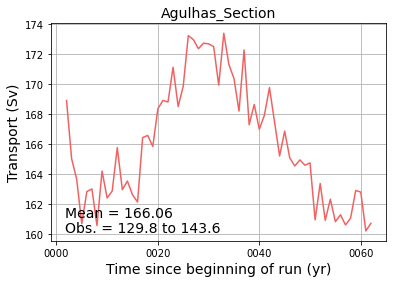

In [10]:
%matplotlib inline
agulhas = Transport(args,sections,'Agulhas_Section',debug=False)
plotPanel(agulhas, observedFlows=sections)

### Bering Strait

here1
here3


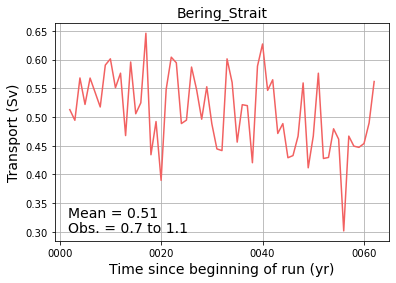

In [11]:
bering = Transport(args, sections, 'Bering_Strait')
plotPanel(bering, observedFlows=sections)

### Barents opening

here1
here3


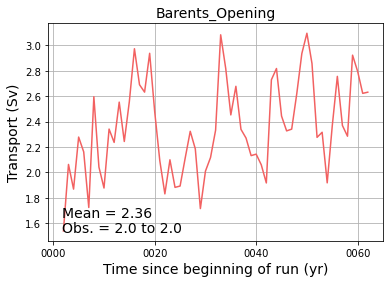

In [12]:
barents = Transport(args, sections, 'Barents_Opening')
plotPanel(barents, observedFlows=sections)

### Davis Strait

here1
here3


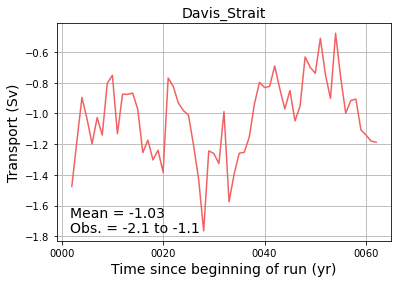

In [13]:
davis = Transport(args, sections,'Davis_Strait')
plotPanel(davis, observedFlows=sections)

### Denmark Strait

here1
here2


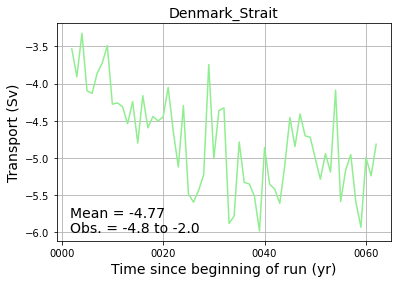

In [14]:
denmark = Transport(args, sections,'Denmark_Strait')
plotPanel(denmark, observedFlows=sections)

### Drake Passage

here1
here3


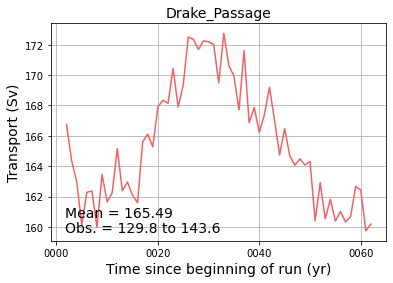

In [15]:
drake = Transport(args, sections,'Drake_Passage')
plotPanel(drake, observedFlows=sections)

### English Channel

here1
here2


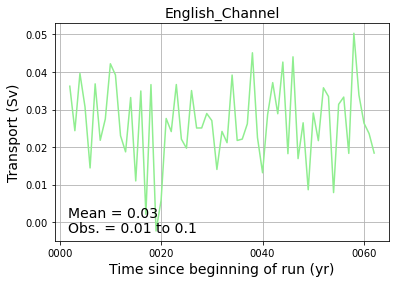

In [16]:
english = Transport(args, sections, 'English_Channel')
plotPanel(english, observedFlows=sections)

### Fram Strait

here1
here2


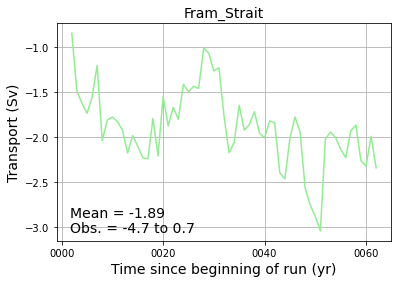

In [17]:
fram = Transport(args, sections, 'Fram_Strait')
plotPanel(fram, observedFlows=sections)

### Florida Bahamas

here1
here3


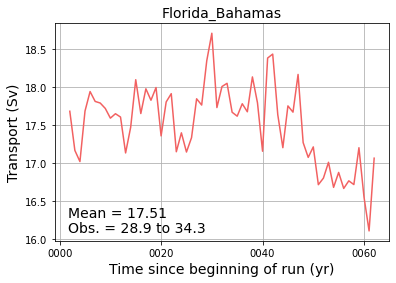

In [18]:
florida1 = Transport(args, sections, 'Florida_Bahamas')
plotPanel(florida1, observedFlows=sections)

### Florida Bahamas extended

here1
here3


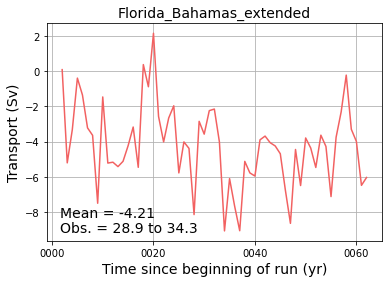

In [19]:
florida2 = Transport(args, sections, 'Florida_Bahamas_extended')
plotPanel(florida2, observedFlows=sections)

### Florida Cuba

here4


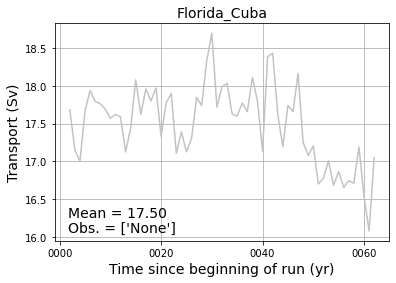

In [49]:
florida3 = Transport(args, sections, 'Florida_Cuba')
plotPanel(florida3, observedFlows=sections)

### Gibraltar Strait

here1
here2


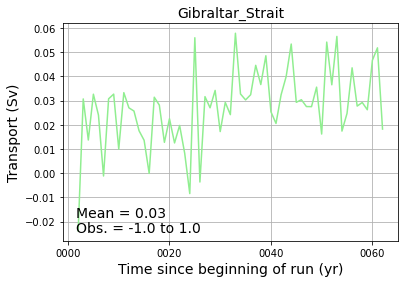

In [50]:
gibraltar = Transport(args, sections, 'Gibraltar_Strait')
plotPanel(gibraltar, observedFlows=sections)

### Iceland Norway

here1
here3


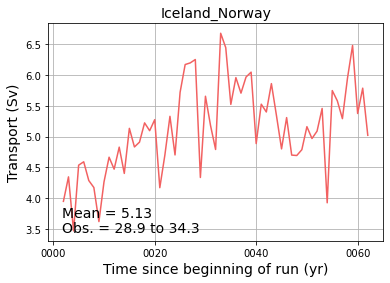

In [51]:
iceland = Transport(args, sections, 'Iceland_Norway')
plotPanel(iceland, observedFlows=sections) 

### Indonesian Throughflow

here1
here3


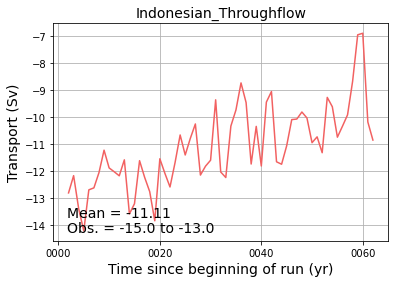

In [52]:
indo = Transport(args, sections, 'Indonesian_Throughflow')
plotPanel(indo, observedFlows=sections)

### Mozambique Channel

here1
here2


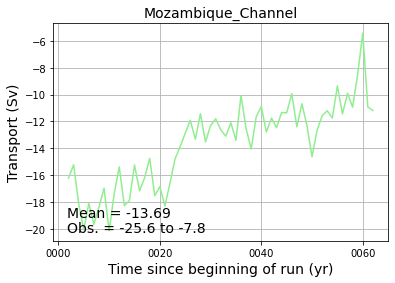

In [53]:
mozambique = Transport(args, sections, 'Mozambique_Channel')
plotPanel(mozambique, observedFlows=sections)

### Pacific undercurrent

here1
here3


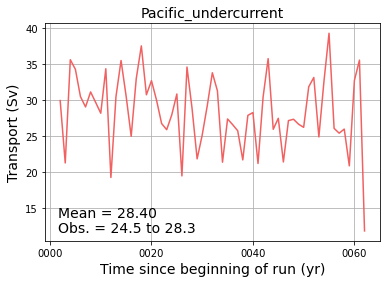

In [54]:
euc = Transport(args, sections, 'Pacific_undercurrent')
plotPanel(euc, observedFlows=sections)

### Taiwan Luzon

here1
here3


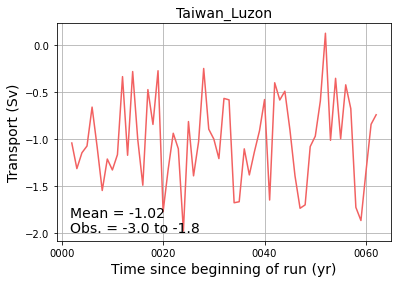

In [55]:
taiwan = Transport(args, sections, 'Taiwan_Luzon')
plotPanel(taiwan, observedFlows=sections)

### Windward Passage

here1
here2


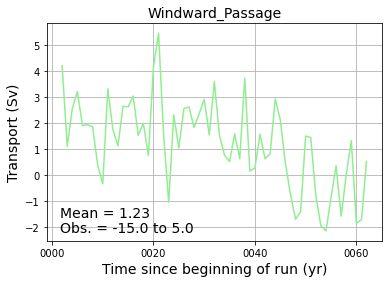

In [56]:
windward = Transport(args, sections, 'Windward_Passage')
plotPanel(windward, observedFlows=sections)

### Robeson_Channel

here4


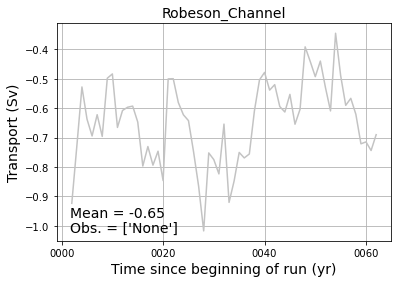

In [57]:
roberson = Transport(args, sections, 'Robeson_Channel')
plotPanel(roberson, observedFlows=sections)

### Yucatan_Channel

here4


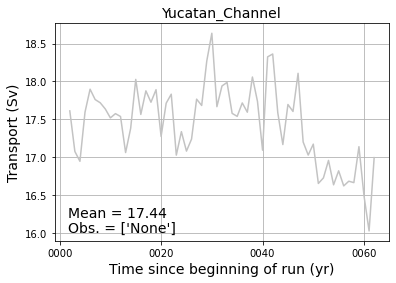

In [58]:
yucatan = Transport(args, sections, 'Yucatan_Channel')
plotPanel(yucatan, observedFlows=sections)

### Bosporus_Strait

here4


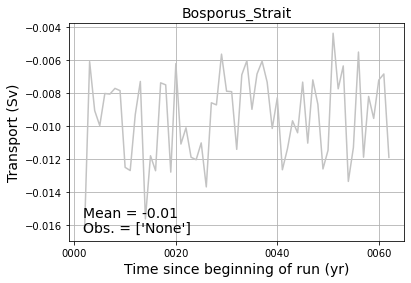

In [59]:
bosporus = Transport(args, sections, 'Bosporus_Strait')
plotPanel(bosporus, observedFlows=sections)